# Biodiversity portfolio project

First things first: We will try to scope out the potential data findings project by looking at the data that we are working with. Let's do this with `pandas.read_csv()` function

In [12]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

print("\n\n\n\n#########################\n\n\n\n")
print(observations.head())
print("\n\n\n\n#########################\n\n\n\n")
print(species.head())
print("\n\n\n\n#########################\n\n\n\n")
print(observations.describe(include='all'))
print("\n\n\n\n#########################\n\n\n\n")
print(species.describe(include='all'))
print("\n\n\n\n#########################\n\n\n\n")






#########################




            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85




#########################




  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              Americ


Lets look at the unique parks that are in our data. For starters the final goal could
be making the bar chart of the observations of all of the species, with stacked bars
which represent how many species of total observations were observed in each park.

In [14]:
parks = observations.park_name.unique()
print(parks)
unique_species = observations.scientific_name.unique()
print(len(unique_species))

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
5541


Okay looks like the total species are too many to include in the single bar chart. Let's think of something else that we can visualize and play with.

Probably animal categories are far less fewer than individual species. Let's see, how many categories are there!


In [15]:
unique_animal_categories = species.category.unique()
print(unique_animal_categories)

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Okay, we see that there are only a few categories. We can do our original idea, but instead of individual species let's use categories!

In [26]:
def find_category(all_species, observed_species):
    # if scientific_name in list(species.scientific_name):
    #     return species[species['scientific_name'] == scientific_name]['category'][0]
    # else:
    #     return 'Unknown'
    
    observed_species_scientific_names = []
    observed_species_category_names = []
    observed_species_conservation_statuses = []
    for _, line_observed in observed_species.iterrows():
        line_dict_observed = dict(line_observed)
        species_scientific_name = line_dict_observed['scientific_name']
        observed_species_scientific_names.append(species_scientific_name)
        observed_species_category_names.append(species[species['scientific_name'] == species_scientific_name]['category'])
        observed_species_conservation_statuses.append(species[species['scientific_name'] == species_scientific_name]['conservation_status'])



    return observed_species_category_names, observed_species_conservation_statuses

    

all_categories_non_unique = find_category(species, observations)
print(all_categories_non_unique)
print(len(observations))

([5192    Vascular Plant
Name: category, dtype: object, 4455    Mammal
Name: category, dtype: object, 5746    Vascular Plant
Name: category, dtype: object, 1866    Vascular Plant
Name: category, dtype: object, 4852    Vascular Plant
Name: category, dtype: object, 2223    Vascular Plant
Name: category, dtype: object, 211    Bird
Name: category, dtype: object, 5587    Vascular Plant
Name: category, dtype: object, 1299    Vascular Plant
Name: category, dtype: object, 2722    Nonvascular Plant
Name: category, dtype: object, 1895    Vascular Plant
Name: category, dtype: object, 296    Bird
Name: category, dtype: object, 2309    Vascular Plant
Name: category, dtype: object, 4912    Vascular Plant
Name: category, dtype: object, 2841    Nonvascular Plant
Name: category, dtype: object, 1053    Vascular Plant
4945    Vascular Plant
Name: category, dtype: object, 1436    Vascular Plant
Name: category, dtype: object, 5616    Vascular Plant
Name: category, dtype: object, 2548    Vascular Plant
Name

In [29]:
categories_strings = [s.iloc[0] for s in all_categories_non_unique[0]]
conservation_statuses_strings = [s.iloc[0] for s in all_categories_non_unique[1]]
observations['category'] = categories_strings
observations['conservation_status'] = conservation_statuses_strings
observations['conservation_status'] = observations['conservation_status'].fillna('No conservation status')
observations.head()


,scientific_name,park_name,observations,category,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,No conservation status
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,No conservation status
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,No conservation status
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,No conservation status
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,No conservation status


okay, we have added category and conservation status for each real observation!

## Explore and explain data

1. What is the distribution of `conservation_status` for animals?
2. Are certain types of species more likely to be endangered?
3. Are the differences betweeen species and their conservation status significant?
4. Which species were spotted the most at each park?

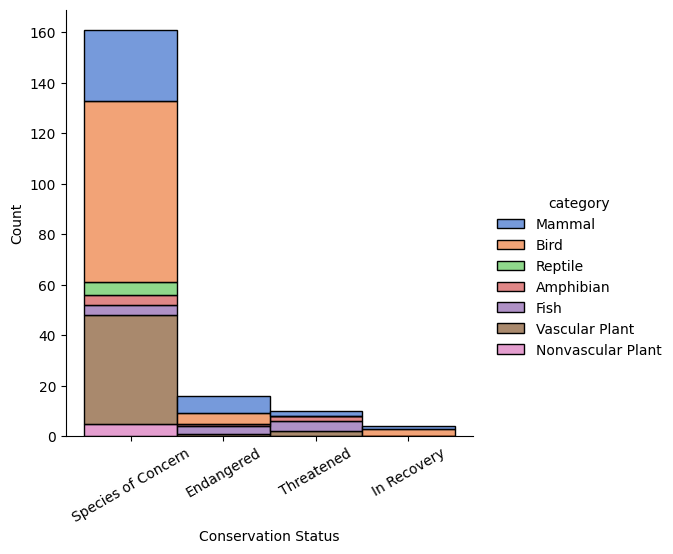

In [30]:
sns.displot(data=species, x='conservation_status', hue='category', multiple='stack', palette='muted')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

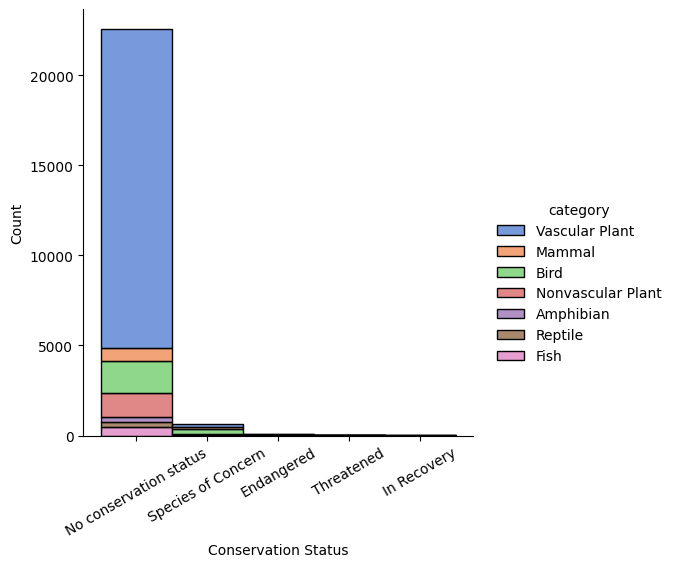

In [31]:
sns.displot(data=observations, x='conservation_status', hue='category', multiple='stack', palette='muted')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

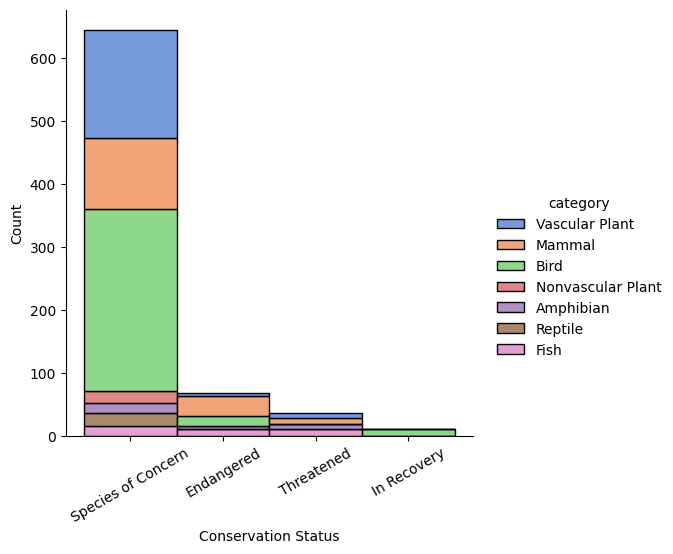

In [32]:
observations['conservation_status'] = observations['conservation_status'].replace('No conservation status', np.nan)

sns.displot(data=observations, x='conservation_status', hue='category', multiple='stack', palette='muted')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

In [37]:
observations_sorted_by_number_of_observations = observations.sort_values(
    by='observations',
    ascending=False
)

observations_sorted_by_number_of_observations.head(5)



,scientific_name,park_name,observations,category,conservation_status
11281,Lycopodium tristachyum,Yellowstone National Park,321,Vascular Plant,NaN
1168,Castilleja miniata,Yellowstone National Park,317,Vascular Plant,NaN
20734,Cryptantha fendleri,Yellowstone National Park,316,Vascular Plant,NaN
8749,Dracocephalum parviflorum,Yellowstone National Park,316,Vascular Plant,NaN
7112,Bidens tripartita,Yellowstone National Park,314,Vascular Plant,NaN


In [38]:
observations_sorted_by_number_of_observations_ascending = observations.sort_values(
    by='observations',
    ascending=True
)

observations_sorted_by_number_of_observations_ascending.head(5)



,scientific_name,park_name,observations,category,conservation_status
9418,Corydalis aurea,Bryce National Park,9,Vascular Plant,NaN
15511,Collomia tinctoria,Great Smoky Mountains National Park,10,Vascular Plant,NaN
16054,Strix occidentalis,Great Smoky Mountains National Park,11,Bird,NaN
18823,Rana sierrae,Great Smoky Mountains National Park,11,Amphibian,Endangered
20375,Sambucus mexicana,Great Smoky Mountains National Park,12,Vascular Plant,NaN


In [39]:
observations_by_park = observations.groupby('park_name')["observations"].sum()
observations_by_park = observations_by_park.sort_values(
    ascending=False
)

observations_by_park.head(3)

park_name
Yellowstone National Park    1443562
Yosemite National Park        863332
Bryce National Park           576025
Name: observations, dtype: int64

### What did I learn throughout the process

I learned to not give up on original Ideas. Even though this took me like a million days for a comparatively easy tasks, I still could not manage sometimes and got stopped by failures in implementation. In the end I produced the plot I wanted and added animal categories to the `observations` dataframe!

### Are the results what I expected

I thought that endangered species will be a majority of all species, but in the end data proved that the most of the species were without a certain endangerment status

### What are the key findings and takeaways

Looking at the results, from the most endangered species the top concerning categories are mammals and birds. Further details visible in the barcharts. Also, I found out which parks had the most observations and which species were the most observed or the least observed. The least observed bird was _Strix occidentalis_.